In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('~/Downloads/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Amount_normalized'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1,1))

In [5]:
df = df.drop(['Time','Amount'],axis=1)

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
x = df.drop(['Class'],axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [47]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train.ravel())
pred1 = logreg.predict(x_test)

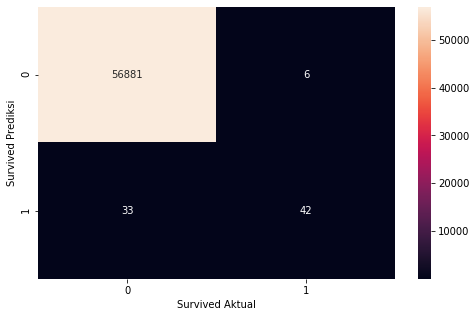

In [48]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, pred1), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Survived Aktual")
plt.ylabel("Survived Prediksi")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [49]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.88      0.56      0.68        75

    accuracy                           1.00     56962
   macro avg       0.94      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train,y_train.ravel())

In [51]:
logreg.fit(x_train_res, y_train_res)

LogisticRegression()

In [52]:
predsm = logreg.predict(x_test)

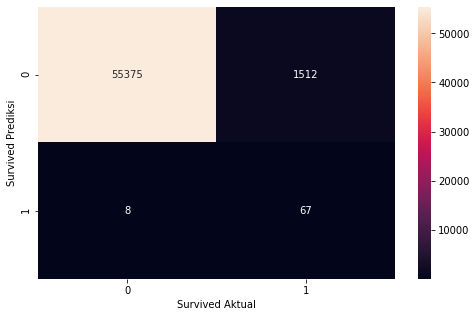

In [53]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predsm), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Survived Aktual")
plt.ylabel("Survived Prediksi")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.88      0.56      0.68        75

    accuracy                           1.00     56962
   macro avg       0.94      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [17]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()

In [18]:
x_train_miss, y_train_miss = nr.fit_sample(x_train, y_train.ravel())

In [19]:
lr = LogisticRegression()
lr.fit(x_train_miss, y_train_miss)

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

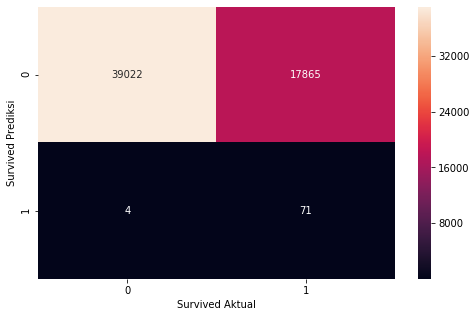

In [20]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, lr.predict(x_test)), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Survived Aktual")
plt.ylabel("Survived Prediksi")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [21]:
print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.69      0.81     56887
           1       0.00      0.95      0.01        75

    accuracy                           0.69     56962
   macro avg       0.50      0.82      0.41     56962
weighted avg       1.00      0.69      0.81     56962



## Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred_tree = tree.predict(x_test)

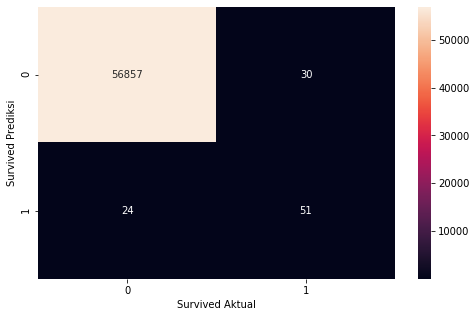

In [24]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Survived Aktual")
plt.ylabel("Survived Prediksi")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [25]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.63      0.68      0.65        75

    accuracy                           1.00     56962
   macro avg       0.81      0.84      0.83     56962
weighted avg       1.00      1.00      1.00     56962



### SMOTE TREE

In [26]:
tree.fit(x_train_res, y_train_res)

DecisionTreeClassifier()

In [27]:
y_pred_tree_SMOTE = tree.predict(x_test)

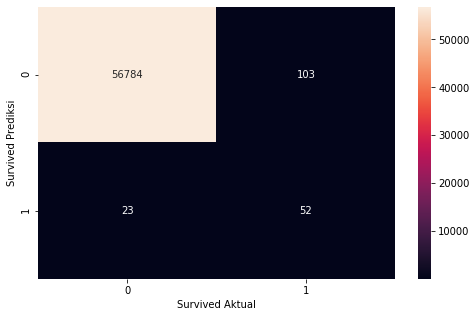

In [28]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_tree_SMOTE), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Survived Aktual")
plt.ylabel("Survived Prediksi")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [29]:
print(classification_report(y_test, y_pred_tree_SMOTE))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.34      0.69      0.45        75

    accuracy                           1.00     56962
   macro avg       0.67      0.85      0.73     56962
weighted avg       1.00      1.00      1.00     56962



### Near Miss Tree

In [30]:
tree.fit(x_train_miss, y_train_miss)

DecisionTreeClassifier()

In [31]:
y_pred_tree_miss = tree.predict(x_test)

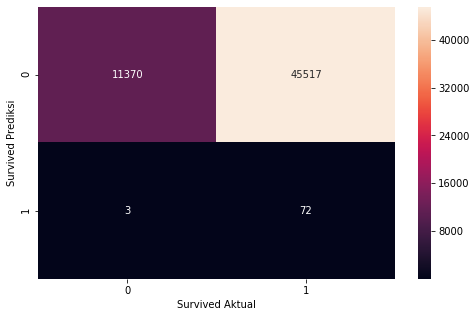

In [32]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_tree_miss), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Survived Aktual")
plt.ylabel("Survived Prediksi")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [33]:
print(classification_report(y_test, y_pred_tree_miss))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33     56887
           1       0.00      0.96      0.00        75

    accuracy                           0.20     56962
   macro avg       0.50      0.58      0.17     56962
weighted avg       1.00      0.20      0.33     56962



## 2

In [34]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [35]:
from sklearn.model_selection import RandomizedSearchCV
modelRS = RandomizedSearchCV(estimator = lr, param_distributions = param, cv = 5, error_score=np.nan)

In [36]:
modelRS.fit(x_train_res, y_train_res)
modelRS.best_params_

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: Co

{'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 1000}

In [37]:
logreg2 = LogisticRegression(solver = 'newton-cg', penalty = 'none', max_iter = 1000)
logreg2.fit(x_train_res , y_train_res)
pred2 = logreg.predict(x_test)

SMOTE + Hypertuning (RandomSearch)

In [40]:
confusion_matrix(y_test, pred2)

array([[55375,  1512],
       [    8,    67]])

In [39]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56887
           1       0.04      0.89      0.08        75

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.99     56962



tanpa perlakuan

In [50]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.88      0.56      0.68        75

    accuracy                           1.00     56962
   macro avg       0.94      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



with SMOTE

In [56]:
print(classification_report(y_test, predsm))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56887
           1       0.04      0.89      0.08        75

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.99     56962



In [55]:
confusion_matrix(y_test, predsm)

array([[55375,  1512],
       [    8,    67]])